<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Rede_neural_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Código de um único Perceptron em python puro:**

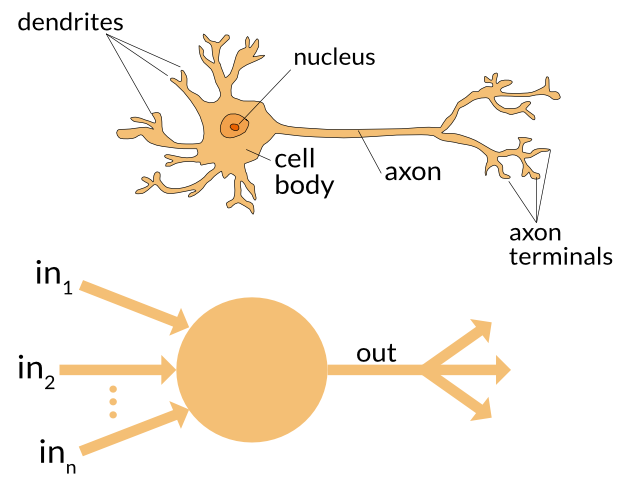

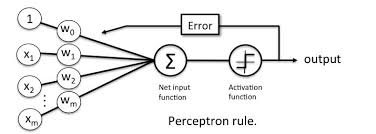

In [ ]:
# Código de Milo Spencer-Harper
# https://gist.github.com/miloharper/62fe5dcc581131c96276

#  Treino (função booleana OU):
#   a b    saída 
#   0 0    0 
#   0 1    1
#   1 0    1
#  Teste:
#   1 1    1 

from numpy import exp, array, random, dot
import numpy as np
entradas_treinamento = array([[0, 0], [0, 1], [1, 0]])
saidas_treinamento = array([[0, 1, 1]]).T
random.seed(1)
pesos_sinapticos = 2 * random.random((2, 1)) - 1 #pesos aleatórios entre -1 e 1
for epoca in range(100):
    saida = 1 / (1 + exp(-(dot(entradas_treinamento, pesos_sinapticos)))) #saídas do neurônio
    mudanca_pesos = dot(entradas_treinamento.T, (saidas_treinamento - saida) * saida * (1 - saida))
    pesos_sinapticos += mudanca_pesos
    print('Mudança nos pesos:', np.linalg.norm(mudanca_pesos))
#Testando com 1 e 1, esperando que dê 1 na saída
print (1 / (1 + exp(-(dot(array([1, 1]), pesos_sinapticos)))))


---
# **Multi-Layer Perceptron:**
[Artigo](https://pabloinsente.github.io/the-multilayer-perceptron) muito bom sobre *backpropagation*. Segue o código produzido:

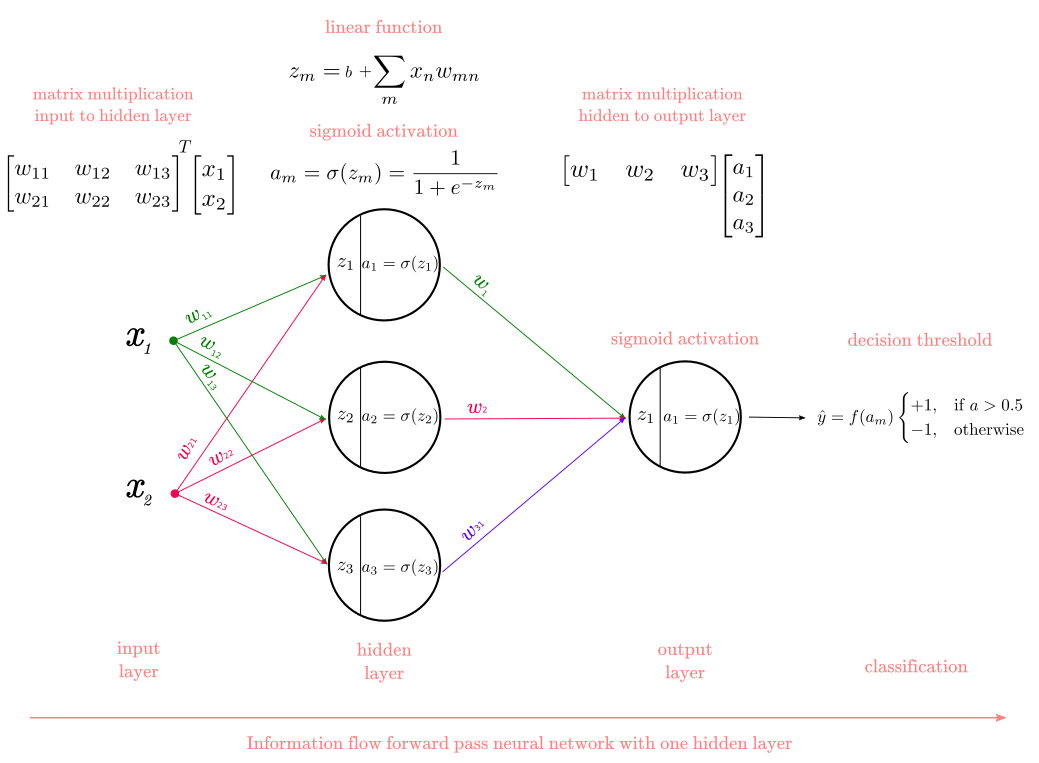

In [ ]:
'''
CODE IMPLEMENTATION

We will implement a multilayer-perceptron with one hidden layer by translating
all our equations into code. One important thing to consider is that we won’t
implement all the loops that the summation notation implies. Loops are known
for being highly inefficient computationally, so we want to avoid them.
Fortunately, we can use matrix operations to achieve the exact same result.
This means that all the computations will be “vectorized”. If you are not
familiar with vectorization you just need to know that instead of looping over
each row in our training dataset we compute the outcome for each row all at
once using linear algebra operations. This makes computation in neural networks
highly efficient compared to using loops. To do this, I’ll only use NumPy which
is the most popular library for matrix operations and linear algebra in Python.
Remember that we need to computer the following operations in order:

-linear function aggregation z
-sigmoid function activation a
-cost function (error) calculation E
-derivative of the error w.r.t. the weights w and bias b in the (L) layer
-derivative of the error w.r.t. the weights w and bias b in the (L−1) layer
-weight and bias update for the (L) layer
-weight and bias update for the (L−1) layer

Those operations over the entire dataset comprise a single “iteration” or “epoch”.
Generally, we need to perform multiple repetitions of that sequence to train the
weights. That loop can’t be avoided unfortunately and will be part of the “fit”
function.
'''

#Inicialize os parâmetros de treinamento:
import numpy as np
def init_parameters(n_features, n_neurons, n_output):
    """generate initial parameters sampled from an uniform distribution
    
    Args:
        n_features (int): number of feature vectors 
        n_neurons (int): number of neurons in hidden layer
        n_output (int): number of output neurons
    
    Returns:
        parameters dictionary:
            W1: weight matrix, shape = [n_features, n_neurons]
            b1: bias vector, shape = [1, n_neurons]
            W2: weight matrix, shape = [n_neurons, n_output]
            b2: bias vector, shape = [1, n_output]
    """
    
    np.random.seed(100) # para reprodutibilidade
    W1 = np.random.uniform(size=(n_features,n_neurons))
    b1 = np.random.uniform(size=(1,n_neurons))
    W2 = np.random.uniform(size=(n_neurons,n_output))
    b2 = np.random.uniform(size=(1,n_output))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
    
'''
Backpropagation is very sensitive to the initialization of parameters. For
instance, in the process of writing this tutorial I learned that this particular
network has a hard time finding a solution if I sample the weights from a normal
distribution with mean = 0 and standard deviation = 0.01, but it does much better
sampling from a uniform distribution. In any case, it is common practice to
initialize the values for the weights and biases to some small values.
'''


# Compute z: linear function
def linear_function(W, X, b):
    """computes net input as dot product
    
    Args:
        W (ndarray): weight matrix
        X (ndarray): matrix of features
        b (ndarray): vector of biases
        
    Returns:
        Z (ndarray): weighted sum of features
    """
    
    return (X @ W)+b

# Compute a: sigmoid activation function
def sigmoid_function(Z):
    """computes sigmoid activation element wise
    
    Args:
        Z (ndarray): weighted sum of features
    
    Returns: 
        S (ndarray): neuron activation
    """
    
    return 1/(1+np.exp(-Z)) 

#Compute cost (error) function E
def cost_function(A, y):
    """computes squared error
    
    Args:
        A (ndarray): neuron activation
        y (ndarray): vector of expected values
    
    Returns:
        E (float): total squared error"""
    
    return (np.mean(np.power(A - y,2)))/2

# Compute predictions y^ with learned parameters
def predict(X, W1, W2, b1, b2):
    """computes predictions with learned parameters
    
    Args:
        X (ndarray): matrix of features
        W1 (ndarray): weight matrix for the first layer
        W2 (ndarray): weight matrix for the second layer
        b1 (ndarray): bias vector for the first layer
        b2 (ndarray): bias vector for the second layer
        
    Returns:
        d (ndarray): vector of predicted values
    """
    
    Z1 = linear_function(W1, X, b1)
    S1 = sigmoid_function(Z1)
    Z2 = linear_function(W2, S1, b2)
    S2 = sigmoid_function(Z2)
    return np.where(S2 >= 0.5, 1, 0)

'''
Since I plan to solve a binary classification problem, we define a threshold
function that takes the output of the last sigmoid activation function and
returns a 0 or a 1 for each class.
'''

'''
Here is where we put everything together to train the network. The first part of
the function initializes the parameters by calling the init_parameters function.
The loop (for _ in range(iterations)) in the second part of the function is where
all the action happens:

-the Forward-propagation section chains the linear and sigmoid functions to
compute the network output.
-the Error computation section computes the cost function value after each
iteration.
-the Backpropagation section does two things:
  -computes the gradients for the weights and biases in the (L) and (L−1) layers
  -update the weights and biases in the (L) and (L−1) layers
-the fit function returns a list of the errors after each iteration and an
updated dictionary with the learned weights and biases.
'''

# Backpropagation and training loop
def fit(X, y, n_features=2, n_neurons=3, n_output=1, iterations=10, eta=0.001):
    """Multi-layer perceptron trained with backpropagation
    
    Args:
        X (ndarray): matrix of features
        y (ndarray): vector of expected values
        n_features (int): number of feature vectors 
        n_neurons (int): number of neurons in hidden layer
        n_output (int): number of output neurons
        iterations (int): number of iterations over the training set
        eta (float): learning rate
        
    Returns: 
        errors (list): list of errors over iterations
        param (dic): dictionary of learned parameters
    """
    
    ## ~~ Initialize parameters ~~##
    param = init_parameters(n_features=n_features, 
                            n_neurons=n_neurons, 
                            n_output=n_output)

    ## ~~ storage errors after each iteration ~~##
    errors = []
    
    for _ in range(iterations):
        
        ##~~ Forward-propagation ~~##
        
        Z1 = linear_function(param['W1'], X, param['b1'])
        S1 = sigmoid_function(Z1)
        Z2 = linear_function(param['W2'], S1, param['b2'])
        S2 = sigmoid_function(Z2)
        
        ##~~ Error computation ~~##
        error = cost_function(S2, y)
        errors.append(error)
        
        ##~~ Backpropagation ~~##
        
        # update output weights
        delta2 = (S2 - y)* S2*(1-S2)
        W2_gradients = S1.T @ delta2
        param["W2"] = param["W2"] - W2_gradients * eta

        # update output bias
        param["b2"] = param["b2"] - np.sum(delta2, axis=0, keepdims=True) * eta

        # update hidden weights
        delta1 = (delta2 @ param["W2"].T )* S1*(1-S1)
        W1_gradients = X.T @ delta1 
        param["W1"] = param["W1"] - W1_gradients * eta

        # update hidden bias
        param["b1"] = param["b1"] - np.sum(delta1, axis=0, keepdims=True) * eta
        
    return errors, param


'''
Application: solving the XOR problem
If you have read this and the previous blogpost in this series, you should know
by now that one of the problems that brought about the “demise” of the interest
in neural network models was the infamous XOR (exclusive or) problem. This was
just one example of a large class of problems that can’t be solved with linear
models as the perceptron and ADALINE. As an act of redemption for neural networks
from this criticism, we will solve the XOR problem using our implementation of
the multilayer-perceptron.

Generate features and target
The first is to generate the targets and features for the XOR problem. Table 1
shows the matrix of values we need to generate, where x1 and x2 are the features
and y the expected output.

Table: Truth Table For XOR Function

x1	x2	y
0 	0	  0
0	  1	  1
1	  0	  1
1	  1	  0
'''

# expected values
y = np.array([[0, 1, 1, 0]]).T

# features
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T
              
'''
Multilayer perceptron training
We will train the network by running 5,000 iterations with a learning rate of η=0.1.
'''
errors, param = fit(X, y, iterations=5000, eta=0.1)
# Multilayer perceptron predictions and error
y_pred = predict(X, param["W1"], param["W2"], param["b1"], param["b2"])
num_correct_predictions = (y_pred == y).sum()
accuracy = (num_correct_predictions / y.shape[0]) * 100
print('Multi-layer perceptron accuracy: %.2f%%' % accuracy)
# Multi-layer perceptron accuracy: 100.00%

import altair as alt
import pandas as pd
alt.data_transformers.disable_max_rows()
df = pd.DataFrame({"errors":errors, "time-step": np.arange(0, len(errors))})
alt.Chart(df).mark_line().encode(x="time-step", y="errors").properties(title='Chart 2')

Multi-layer perceptron accuracy: 100.00%


alt.Chart(...)

#**MLP usando SkLearn (mesmo problema da função booleana OU):**

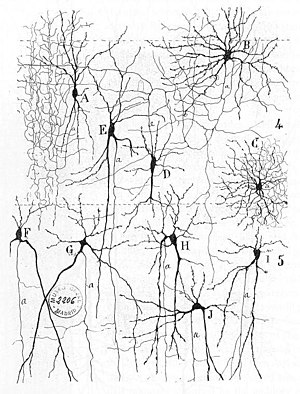

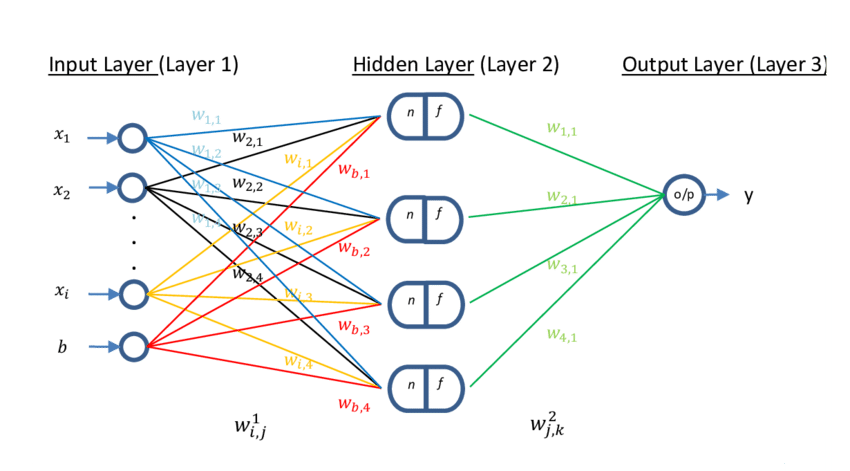

In [ ]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.]]
y = [0., 1., 1.]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2), random_state=1)
clf.fit(X, y) #treino
clf.predict([[1.,1.]]) # aplicação/teste

array([1.])

#**MLP usando SkLearn (base íris):**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns # visualization
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

In [ ]:
#transformando a base em um dataframe def sklearn_to_df(sklearn_dataset):
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = pd.Series([iris['target_names'][iris['target'][i]] for i in range(150)])

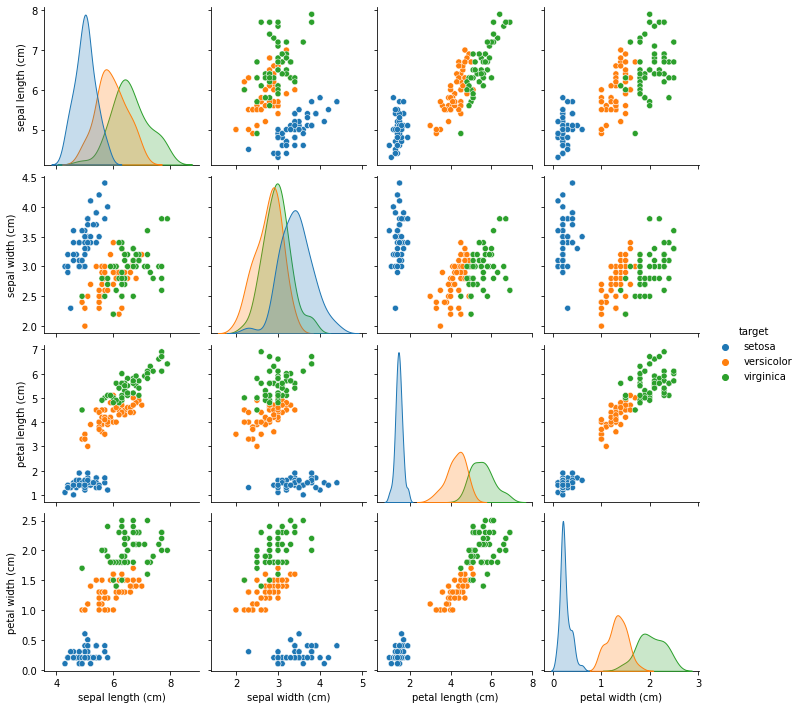

In [ ]:
sns.pairplot( data=df_iris, vars=('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'), hue='target' )

In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

from sklearn.metrics import classification_report
print('Relatório:\n',classification_report(y_test,prediction))
print("\nMatriz de confusão detalhada:\n",
      pd.crosstab(y_test, prediction, rownames=['Real'], colnames=['Predito'],
      margins=True, margins_name='Todos'))

Relatório:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.85      1.00      0.92        11
           2       1.00      0.92      0.96        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.96      0.95      0.95        38


Matriz de confusão detalhada:
 Predito   0   1   2  Todos
Real                      
0        13   1   0     14
1         0  11   0     11
2         0   1  12     13
Todos    13  13  12     38


#**Keras (base MNIST):**

In [ ]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

# Carregamos os dados do conjunto de dados MNIST do pacote Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_copy = X_test
y_test_copy = y_test

# Redimensionamos os dados e fazemos cast para float32
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

# Normalizamos os dados entre 0 e 1 (Dividimos pelo maximo)
X_train /= 255
X_test /= 255

# Convertemos de vetores de classes para matrizes binárias de classes.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(units=512, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(units=512))
model.add(Activation('relu'))

model.add(Dense(units=10))
model.add(Activation('softmax'))

#Imprimimos o modelo no console
model.summary()

#Compilamos/Criamos o modelo
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

#Executamos o treinamento
history = model.fit(X_train, Y_train, batch_size=128, verbose=1, validation_data=(X_test, Y_test))

#Testamos o modelo e imprimimos o resultado
score = model.evaluate(X_test, Y_test, verbose=0)
print('Score:', score[0])
print('Accuracy:', score[1])

# salve o modelo treinado e a arquitetura da rede para um único arquivo
model.save("model.h5")
print('Modelo salvo no disco')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [ ]:
import numpy as np
from keras.models import load_model
 
# carregue o modelo
model = load_model('model.h5')
# summarize model
model.summary()
predicao = np.argmax(model.predict(X_test),axis=1)
print(predicao[0:100].reshape(10,10))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

Previsões:

7  2  1  0  4  1  4  9  5  9  
0  6  9  0  1  5  9  7  3  4  
9  6  6  5  4  0  7  4  0  1  
3  1  3  4  7  2  7  1  2  1  
1  7  4  2  3  5  1  2  4  4  
6  3  5  5  6  0  4  1  9  5  
7  2  9  3  7  4  6  4  3  0  
7  0  2  9  1  7  3  2  9  7  
9  6  2  7  8  4  7  3  6  1  
3  6  4  3  1  4  1  7  6  9  

Imagens:



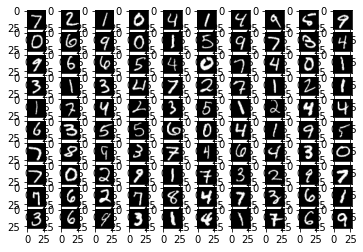


Erros = 3
Errei na linha 7 e coluna 2: Real = 8, Predito = 2
Errei na linha 9 e coluna 1: Real = 7, Predito = 9
Errei na linha 10 e coluna 3: Real = 9, Predito = 4



In [ ]:
# example of loading the mnist dataset
from matplotlib import pyplot
erros = 0
errosSumario=''
print('Previsões:')
# plot first few images
for i in range(100):
  # define subplot
  pyplot.subplot(10, 10, 1 + i)
  # plot raw pixel data
  pyplot.imshow(X_test_copy[i], cmap=pyplot.get_cmap('gray'))
  if(i%10 == 0): print('')
  print(predicao[i], end='  ')
  if predicao[i] != y_test[i]:
    erros += 1
    errosSumario += ('Errei na linha ' + str(i//10 + 1) + ' e coluna ' + str(i%10 + 1) +
      ': Real = ' + str(y_test[i]) + ', Predito = ' + str(predicao[i]) + '\n')
# show the figure
print('\n\nImagens:\n')
pyplot.show()
print('\nErros =', erros)
print(errosSumario)

In [ ]:
print(np.argmax([0,0,0,0,0,0,0.5]))

6
